In [83]:
import spacy
import en_core_web_sm
import pandas as pd
import matplotlib.pyplot as plt

In [84]:
nlp = en_core_web_sm.load()

In [17]:
df = pd.read_csv('data/augmented_data.csv')
df

,Text Command,Topic,Identifier,Action,One Hot Encoded Topic,One Hot Encoded Action,Verb/Noun
0,assign completed status to X,Task,X,Completed,"[1,0]","[0,0,0,0,1]",assign
1,move X to completed,Task,X,Completed,"[1,0]","[0,0,0,0,1]",move
2,X completed,Task,X,Completed,"[1,0]","[0,0,0,0,1]",completed
3,Completed X,Task,X,Completed,"[1,0]","[0,0,0,0,1]",completed
4,X in progress,Task,X,In Progress,"[1,0]","[0,1,0,0,0]",in progress
...,...,...,...,...,...,...,...
3718,Project X happening schedule,Project,X,On Target,"[0,1]","[0,1,0,0,0]",SYNREPLACED
3719,Project X on-duty schedule,Project,X,On Target,"[0,1]","[0,1,0,0,0]",SYNREPLACED
3720,Project X on duty schedule,Project,X,On Target,"[0,1]","[0,1,0,0,0]",SYNREPLACED
3721,Project X on agenda,Project,X,On Target,"[0,1]","[0,1,0,0,0]",SYNREPLACED


In [74]:
identifier_pos = pd.DataFrame(columns = ['Text Command', 'Identifier', 'Tag Start', 'Tag End'])

In [96]:
for i in range(len(df.index)):
    
    sentence = nlp(df.loc[i][0])
    identifier = df.loc[i][2]
    last_word = nlp('SS')
    for token in last_word:
        last_word = token
    tag_end = None
    for token in sentence:
        if token.text == identifier:
            if last_word.text == 'SS':
                tag_start = 'SS'
            else:
                tag_start = last_word.tag_
        if last_word.text == identifier:
            tag_end = token.tag_
        last_word = token
    if tag_end == None:
        tag_end = 'ES'
    identifier_pos.loc[i] = [df.loc[i][0], df.loc[i][2], tag_start, tag_end]


In [101]:
identifier_pos[(identifier_pos['Tag Start'] == 'NN') & (identifier_pos['Tag End'] == 'ES')]

,Text Command,Identifier,Tag Start,Tag End
6,Create task X,X,NN,ES
7,New task X,X,NN,ES
14,Create new task X,X,NN,ES
22,in progress X,X,NN,ES
23,in progress task X,X,NN,ES
...,...,...,...,...
3686,assign obstructed to task X,X,NN,ES
3687,assign out of use to task X,X,NN,ES
3688,assign blocked to job X,X,NN,ES
3690,assign blocked to tax X,X,NN,ES


In [98]:
tag_start_dict = dict()
tag_end_dict = dict()
tag_combo_dict = dict()
for i in range(len(identifier_pos.index)):
    tag_start = identifier_pos.loc[i][2]
    tag_end = identifier_pos.loc[i][3]
    tag_combo = tag_start + '-' + tag_end
    if tag_start_dict.get(tag_start,0) == 0:
        tag_start_dict[tag_start] = 1
    else:
        tag_start_dict[tag_start] += 1
    if tag_end_dict.get(tag_end,0) == 0:
        tag_end_dict[tag_end] = 1
    else:
        tag_end_dict[tag_end] += 1
    if tag_combo_dict.get(tag_combo,0) == 0:
        tag_combo_dict[tag_combo] = 1
    else:
        tag_combo_dict[tag_combo] += 1
    
    

In [99]:
sorted_combo_tag_dict = {k: v for k, v in sorted(tag_combo_dict.items(), key=lambda item: item[1],reverse=True) if v>=50}

<BarContainer object of 16 artists>

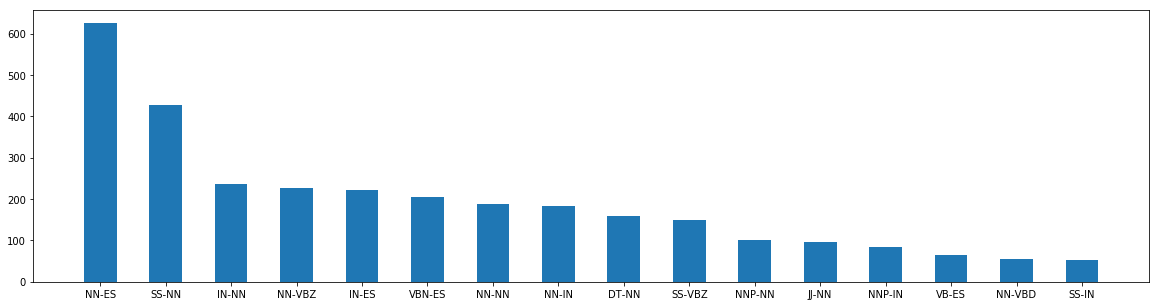

In [100]:
plt.figure(figsize=(20,5))
plt.bar(list(sorted_combo_tag_dict.keys()),list(sorted_combo_tag_dict.values()),width=0.5)